In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
AviationData = pd.read_csv("../analysis/AviationData.csv")

In [115]:
AviationData

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,20140918X93937,Accident,CEN14LA504,2014-09-18,"Bloomington, IN",United States,39.164722,-86.618889,KBMG,Monroe County Airport,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,05-01-2016
9995,20140922X90145,Accident,CEN14WA509,2014-09-17,"LE TOUGUET, FRANCE",France,NaN,NaN,LFAT,Le Touquet C??te d'Opale Airpor,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Landing,Foreign,NaN
9996,20140917X83320,Accident,ANC14CA084,2014-09-17,"CANTWELL, AK",United States,62.950833,-148.246666,NaN,NaN,...,Instructional,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,09-10-2015
9997,20141029X71607,Incident,DCA15WA016B,2014-09-17,"Malaga, Spain",Spain,NaN,NaN,LEMG,Malaga,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Foreign,NaN


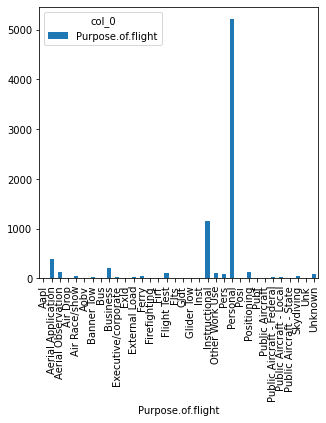

In [116]:
purpose_table = pd.crosstab(index=AviationData["Purpose.of.flight"], columns="Purpose.of.flight")
purpose_table.plot(kind="bar",
                 figsize=(5,5));

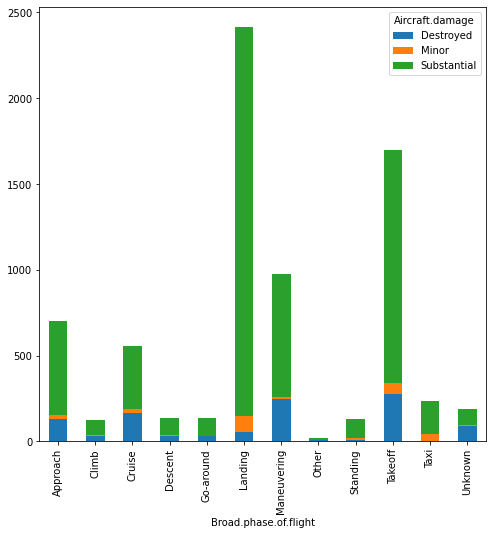

In [117]:
destroyed_table = pd.crosstab(index=AviationData["Broad.phase.of.flight"], 
                          columns=AviationData["Aircraft.damage"])


destroyed_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);


<AxesSubplot:ylabel='Injury.Severity'>

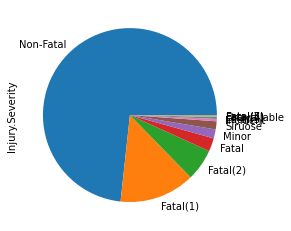

In [118]:
#amateur
things = AviationData[AviationData["Amateur.Built"] == "Yes"]["Injury.Severity"]
things_count = things.value_counts()
things_count.plot(kind = 'pie', fontsize = 10)

<AxesSubplot:ylabel='Injury.Severity'>

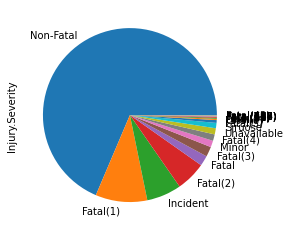

In [119]:
#pro built

things = AviationData[AviationData["Amateur.Built"] == "No"]["Injury.Severity"]
things_count = things.value_counts()
things_count.plot(kind = 'pie', fontsize = 10)

In [120]:
AviationData[AviationData["Total.Fatal.Injuries"] >= 150]["Make"].value_counts()

Boeing              3
Airbus              2
Airbus Industrie    1
Name: Make, dtype: int64

<AxesSubplot:ylabel='Broad.phase.of.flight'>

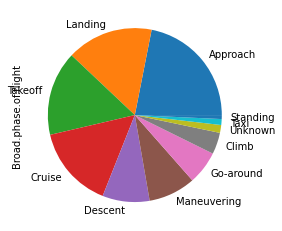

In [121]:

things = AviationData[AviationData["Weather.Condition"] == "IMC"]["Broad.phase.of.flight"]
things_count = things.value_counts()
things_count.plot(kind = 'pie', fontsize = 10)

In [122]:
AviationData[AviationData["Aircraft.Category"] == "Balloon"]["Aircraft.damage"].value_counts()

Substantial    15
Minor           8
Destroyed       3
Name: Aircraft.damage, dtype: int64

In [123]:
AviationData.plot(x = "Number.of.Engines", y="Total..Injuries", kind="line")

KeyError: 'Total..Injuries'

In [ ]:
things_count = AviationData["Number.of.Engines"]
things_count.plot(kind = 'pie', fontsize = 10)

In [ ]:
AviationData[AviationData['Total.Fatal.Injuries'] == 224.0].index.tolist()
AviationData.iloc[8221]

In [ ]:
state_dict = {}
States = ["CA","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MI","MN","MS","MO","MT","NE","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WV","WI","WY"]
for i in States: 
    State = AviationData["LOCATION"].str.contains(i, na=False)
    Total = AviationData[State].shape[0]
    state_dict.update({i:Total})

sorted_d = dict( sorted(state_dict.items(), key=operator.itemgetter(1),reverse=True))
state_df  = pd.DataFrame(list(sorted_d.items()))

state_df

Gulf of mexico
GM
Atlantic ocean
AO
Pacific ocean
PO

In [124]:
state_dict = {}

North_East = ["CT", "ME", "MA", "NH", "RI","VT", "NJ", "NY", "PA"]
Mid_West = ["IL", "IN", "MI","OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD"]
South = ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "WV", "AL", "KY", "MS", "TN","TX", "OK", "LA", "AR"]
West = ["CO", "ID", "MT", "NV", "NM","UT","WY", "AK", "CA","HI","OR", "WA"]
Seas = ["GM", "AO", "PO"]

States = ["CA","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MI","MN","MS","MO","MT","NE","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WV","WI","WY"]
for i in Seas: 
    State = AviationData["LOCATION"].str.contains(i, na=False)
    Total = AviationData[State].shape[0]
    state_dict.update({i:Total})

sorted_d = dict( sorted(state_dict.items(), key=operator.itemgetter(1),reverse=True))
state_df  = pd.DataFrame(list(sorted_d.items()))

Total = state_df[1].sum()
print("Water")
print("Total",Total)
print(state_df)


Water
Total 286
    0    1
0  PO  247
1  AO   20
2  GM   19
